In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('real_estate_data.csv')


In [3]:
df.shape

(30, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_id             30 non-null     int64  
 1   address                 30 non-null     object 
 2   city                    30 non-null     object 
 3   state                   30 non-null     object 
 4   zip_code                30 non-null     int64  
 5   property_type           30 non-null     object 
 6   bedrooms                30 non-null     int64  
 7   bathrooms               30 non-null     float64
 8   sqft                    30 non-null     int64  
 9   lot_size                30 non-null     float64
 10  year_built              30 non-null     int64  
 11  listing_price           30 non-null     int64  
 12  sold_price              30 non-null     int64  
 13  days_on_market          30 non-null     int64  
 14  listing_date            30 non-null     obje

In [5]:
df.isnull().sum()

property_id               0
address                   0
city                      0
state                     0
zip_code                  0
property_type             0
bedrooms                  0
bathrooms                 0
sqft                      0
lot_size                  0
year_built                0
listing_price             0
sold_price                0
days_on_market            0
listing_date              0
sold_date                 0
agent_id                  0
agent_name                0
agent_experience_years    0
neighborhood              0
school_rating             0
crime_rate                0
walkability_score         0
has_pool                  0
has_garage                0
hoa_fee                   0
dtype: int64

In [6]:
property_type_count = df['property_type'].value_counts()
property_type_count['Percentage'] = property_type_count / len(df) * 100

print(property_type_count)

property_type
Single Family                                                   13
Condo                                                           10
Townhouse                                                        7
Percentage       property_type
Single Family    43.333333
Condo...
Name: count, dtype: object


In [7]:
property_type_counts = (
    df['property_type'].value_counts().to_frame(
        name='count'
    )
)

property_type_counts['percentage'] = property_type_counts['count'] / len(df) * 100

print(property_type_counts)

               count  percentage
property_type                   
Single Family     13   43.333333
Condo             10   33.333333
Townhouse          7   23.333333


<Axes: title={'center': 'Average Listing Price by City'}, xlabel='city'>

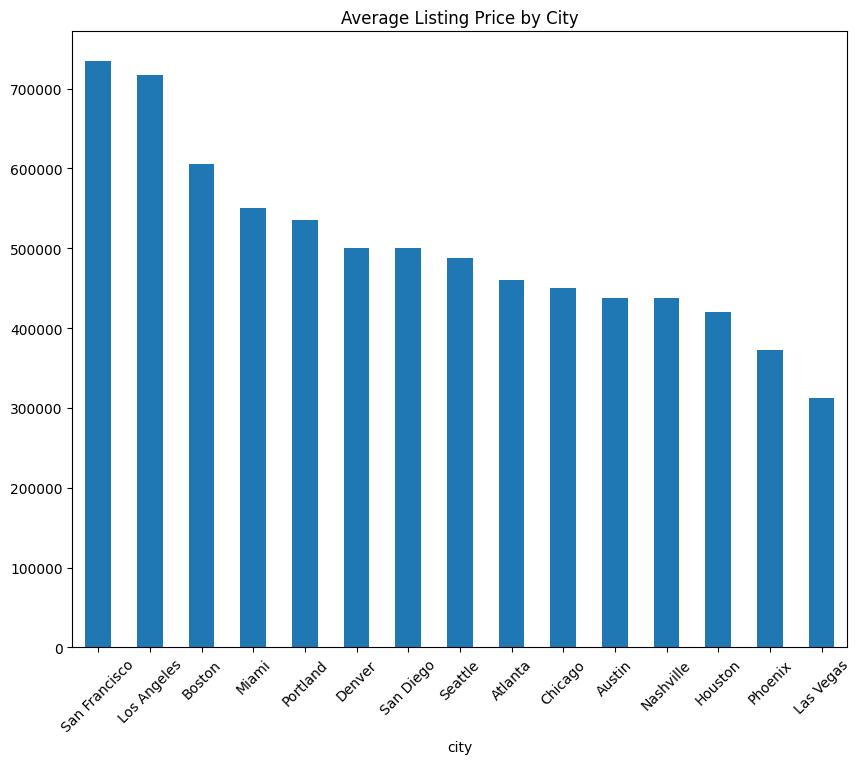

In [8]:
average_price_per_city = (
    df.groupby('city')['listing_price']
      .mean()
      .reset_index(name='average_price').sort_values(by='average_price', ascending=False)
)

average_price_per_city.plot(
    x='city',
    y='average_price',
    kind='bar',
    rot=45,
    figsize =(10,8),
    title='Average Listing Price by City',
    legend=False
)


In [9]:
df['price_per_sqft'] =  df['sold_price'] / df['sqft']

largest_price_per_sqft = df.sort_values(by='price_per_sqft',ascending=False).head(5)
print(largest_price_per_sqft[['property_id','address','city','state','price_per_sqft']])

    property_id           address           city state  price_per_sqft
25           26  608 Orange Drive         Boston    MA      769.230769
3             4    321 Elm Street  San Francisco    CA      743.750000
11           12  963 Poplar Place        Seattle    WA      586.666667
4             5    654 Cedar Lane  San Francisco    CA      546.875000
20           21    153 Fig Street         Austin    TX      471.428571


In [10]:
#How many properties have a pool
#What is the average sold price of properties with a pool vs Without a pool
#Is there a significant difference between the two groups


count_property_have_pools = df[df['has_pool'] == 1].shape[0]

all_price_with_pool =    df[df['has_pool'] == 1]['sold_price'].mean()
all_price_with_no_pool = df[df['has_pool'] == 0]['sold_price'].mean()

average_properties_diff = all_price_with_pool - all_price_with_no_pool

significant_difference = (average_properties_diff / all_price_with_no_pool) * 100

print(f'There was a {count_property_have_pools} property have pools')
print(f'the difference betweet property with pool and property without pool is {average_properties_diff:.2f}')
print(f'the significant difference is {significant_difference:.2f}%')




There was a 7 property have pools
the difference betweet property with pool and property without pool is 130217.39
the significant difference is 27.14%


In [11]:
##- Total number of properties sold
##- Total sales volume (sum of sold_price)
##- Average days on market for their listings

#convert date into pd_dataframe()

df['sold_date'] = pd.to_datetime(df['sold_date'])


df['status'] = df['sold_date'].apply(
    lambda x: 'Sold' if x < pd.Timestamp('2026-01-12') else 'Not_Sold'
    )

total_sale_volume = df.groupby('status')['sold_price'].sum()

number_of_sold = df[df['status'] == 'Sold'].shape[0]

average_days_on_market = df['days_on_market'].mean()


print(f'The total numbero of properties sold was {number_of_sold}')
print(f'The total sales volume was {total_sale_volume}')
print(f'The average days on market was {average_days_on_market:.2f}')




The total numbero of properties sold was 30
The total sales volume was status
Sold    15305000
Name: sold_price, dtype: int64
The average days on market was 34.03


In [12]:
# Create a column `price_difference` = listing_price - sold_price
# Create a column `price_diff_pct` = (price_difference / listing_price) * 100
# Which property type has the highest average negotiation discount?
# Find properties that sold ABOVE listing price


df['price_difference'] = df['listing_price'] - df['sold_price']
df['price_dff_pct'] = (df['price_difference'] / df['listing_price'])  * 100

highest_discount_property = df.groupby('property_type')['price_dff_pct'].mean().sort_values(ascending=False).head(1)
print(f'{highest_discount_property} this was the highest discount property type')


property_sold_by_above_listing_price = df[df['listing_price'] > df['sold_price'].mean()]
print(f'{property_sold_by_above_listing_price.head(5)} this was the property sold above listing price')










property_type
Single Family    1.003766
Name: price_dff_pct, dtype: float64 this was the highest discount property type
   property_id          address           city state  zip_code  property_type  \
0            1   123 Oak Street    Los Angeles    CA     90001  Single Family   
2            3    789 Pine Road      San Diego    CA     92101  Single Family   
3            4   321 Elm Street  San Francisco    CA     94102          Condo   
4            5   654 Cedar Lane  San Francisco    CA     94103      Townhouse   
5            6  987 Birch Drive    Los Angeles    CA     90003  Single Family   

   bedrooms  bathrooms  sqft  lot_size  ...  school_rating  crime_rate  \
0         4        3.0  2500      0.25  ...              8         2.1   
2         3        2.0  1800      0.15  ...              9         1.8   
3         1        1.0   800      0.00  ...              6         4.2   
4         3        2.5  1600      0.10  ...              7         3.8   
5         5        4.0 

In [13]:
market_speed_state = df.groupby('state').agg({
    'days_on_market': 'mean',
    'days_on_market':'median',
})

market_speed_state.sort_values(by='days_on_market', ascending=False, inplace=True)
market_speed_state.head(10)




,days_on_market
state,
GA,44.5
NV,36.5
OR,36.5
AZ,35.0
CA,35.0
MA,35.0
FL,33.0
IL,32.0
TN,31.5


<Axes: xlabel='state'>

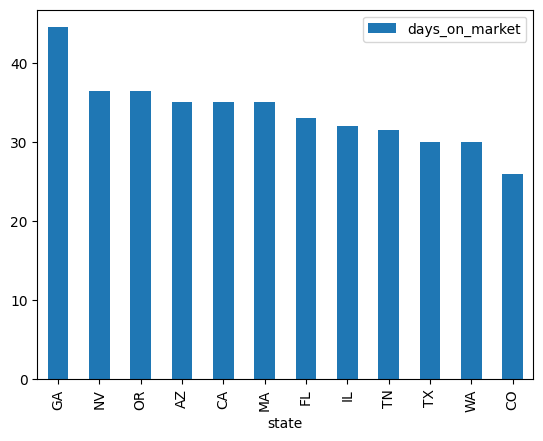

In [14]:
market_speed_state.plot(kind='bar')

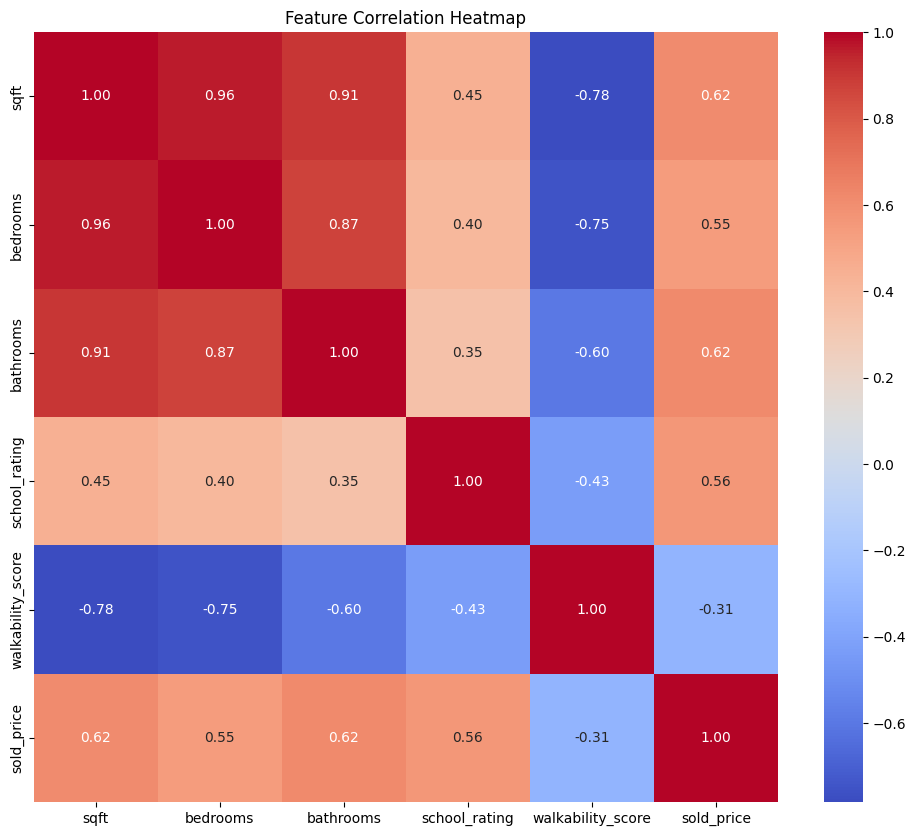

In [15]:
correlation = df[['sqft','bedrooms','bathrooms','school_rating','walkability_score','sold_price']].corr()


plt.figure(figsize=(12,10))
sns.heatmap(

    correlation,
    annot=True,
    fmt='.2f',
    cmap='coolwarm'
)

plt.title('Feature Correlation Heatmap')
plt.show()






In [16]:
df['listing_date'] = pd.to_datetime(df['listing_date'])
df['sold_date'] = pd.to_datetime(df['sold_date'])

get_months_with_most_listing = df.groupby(df['listing_date'].dt.month).size().sort_values(ascending=True)

print(get_months_with_most_listing)

listing_date
1    13
2    17
dtype: int64


In [17]:
avg_sale_price_by_month = df.groupby(df['sold_date'].dt.month)['sold_price'].mean()

In [18]:
avg_sale_price_by_month = (
    df
    .groupby(df['listing_date'].dt.month)['sold_price']
    .mean()
    .reset_index(name='average_sale_price')
)

print(avg_sale_price_by_month)

   listing_date  average_sale_price
0             1       602307.692308
1             2       439705.882353


In [19]:
avg_sale_price_by_month =(
    df.assign(month=df['listing_date'].dt.month_name())
    .groupby('month')['sold_price']
    .mean()
    .reset_index(name='average_sale_price')
)

print(avg_sale_price_by_month)

      month  average_sale_price
0  February       439705.882353
1   January       602307.692308


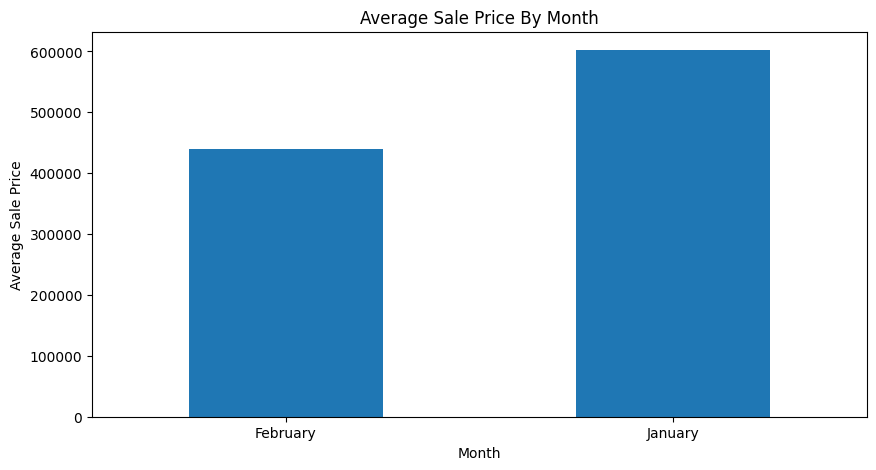

In [20]:
avg_sale_price_by_month.plot(

    x='month',
    y='average_sale_price',
    kind='bar',

    figsize=(10,5),
    rot=0,
    legend=False,
    title='Average Sale Price By Month'

)

plt.ylabel('Average Sale Price')
plt.xlabel('Month')
plt.show()

In [21]:
#**Task:** Create market segments based on price:

#- Budget: sold_price < $400,000
#- Mid-Range: $400,000 <= sold_price < $600,000
#- Premium: $600,000 <= sold_price < $800,000
#- Luxury: sold_price >= $800,000

#For each segment, find:

#- Count of properties
#- Average sqft
#- Average days on market
#- Most common property type



#df['market_base'] = df['sold_price']

#bins = [0,400_000,600_000,800_000,float('inf')]
#labels = ['Budget','Mid-Range','Premium','Luxury']

df['market_base'] = pd.cut(
    df['sold_price'],
    bins=bins,
    labels=labels,
    right=False
)

NameError: name 'bins' is not defined

In [ ]:
count_of_properties_status = df.groupby('market_base').size().reset_index(name='count')
print(count_of_properties_status)

  market_base  count
0      Budget      8
1   Mid-Range     15
2     Premium      5
3      Luxury      2


C:\Users\francis\AppData\Local\Temp\ipykernel_27752\316867708.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_of_properties_status = df.groupby('market_base').size().reset_index(name='count')


In [ ]:
average_of_properties_status = df.groupby('market_base')['sqft'].mean()
print(average_of_properties_status)


market_base
Budget       1137.500000
Mid-Range    1466.666667
Premium      2120.000000
Luxury       2400.000000
Name: sqft, dtype: float64


C:\Users\francis\AppData\Local\Temp\ipykernel_27752\2360342615.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_of_properties_status = df.groupby('market_base')['sqft'].mean()


In [ ]:
average_days_on_market = df.groupby('market_base')['days_on_market'].mean()
print(average_days_on_market)





market_base
Budget       27.625000
Mid-Range    28.466667
Premium      52.600000
Luxury       55.000000
Name: days_on_market, dtype: float64


C:\Users\francis\AppData\Local\Temp\ipykernel_27752\1683984842.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_days_on_market = df.groupby('market_base')['days_on_market'].mean()


In [ ]:
#- Assume annual appreciation rate of 3% based on year_built to current year (2024)
#- Calculate estimated original purchase price
#- Calculate total appreciation for each property
#- Which neighborhood has the best estimated ROI?

In [ ]:
year_built_since =  2024 - df['year_built']
original_price = df['sold_price'] / (1.03 ** year_built_since)
df['original_price'] = df['sold_price'] / (1.03 ** year_built_since)

df['appreciation'] = df['sold_price'] - original_price
df['roi'] = (df['appreciation'] / df['original_price'] * 100)
appreciation = df['sold_price'] - original_price



KeyError: 'appriciation'